In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

import keras

Using TensorFlow backend.


In [2]:
keras.backend.backend()

'tensorflow'

In [3]:
from keras.datasets import fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


plot an d check the dataset 

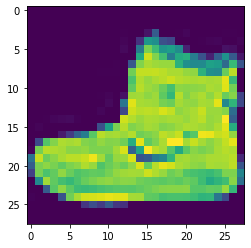

In [5]:
plt.imshow(x_train[0])
plt.show()

In [6]:
y_train[1]

0

now normalised the value 

In [7]:
X_train = x_train/255
X_test = x_test/255

In [8]:
print(x_train.shape)
print(X_train.shape)
print(x_train[:5])
print(X_train[:5])

(60000, 28, 28)
(60000, 28, 28)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]



In [9]:
from keras.utils import np_utils 
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

print(Y_train.shape)

(60000, 10)


In [10]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation , Flatten, Dense, MaxPool2D, Dropout

now creating model 

In [12]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape = (28,28,1)))  #28,28,1
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3)))   #28-3+1=26 means (26,26,32)
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3)))   #28-3+1=26 means (26,26,32)
model.add(Activation('relu'))

# now reduce the dimension 
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3)))
model.add(Activation('relu'))


model.add(Flatten())

# for cover the overfitting
model.add(Dropout(0.25))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
activation_3 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)       

In [13]:
# model compilation

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
# model fitting

model.fit(X_train, Y_train,
         validation_data=(X_test, Y_test),
         batch_size=16,
         epochs=12,
         verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
 - 203s - loss: 0.4526 - accuracy: 0.8364 - val_loss: 0.3640 - val_accuracy: 0.8699
Epoch 2/12
 - 212s - loss: 0.3051 - accuracy: 0.8895 - val_loss: 0.2798 - val_accuracy: 0.9011
Epoch 3/12
 - 208s - loss: 0.2655 - accuracy: 0.9041 - val_loss: 0.2743 - val_accuracy: 0.9003
Epoch 4/12
 - 208s - loss: 0.2432 - accuracy: 0.9117 - val_loss: 0.2608 - val_accuracy: 0.9073
Epoch 5/12
 - 207s - loss: 0.2277 - accuracy: 0.9172 - val_loss: 0.2477 - val_accuracy: 0.9108
Epoch 6/12
 - 210s - loss: 0.2142 - accuracy: 0.9225 - val_loss: 0.2481 - val_accuracy: 0.9124
Epoch 7/12
 - 217s - loss: 0.2059 - accuracy: 0.9236 - val_loss: 0.2353 - val_accuracy: 0.9142
Epoch 8/12
 - 213s - loss: 0.1940 - accuracy: 0.9300 - val_loss: 0.2449 - val_accuracy: 0.9115
Epoch 9/12
 - 213s - loss: 0.1860 - accuracy: 0.9319 - val_loss: 0.2351 - val_accuracy: 0.9139
Epoch 10/12
 - 212s - loss: 0.1790 - accuracy: 0.9343 - val_loss: 0.2430 - val_accuracy: 0.9190